# Neural Network Implementation in Keras

Keras is a high level neural network's API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.

-----

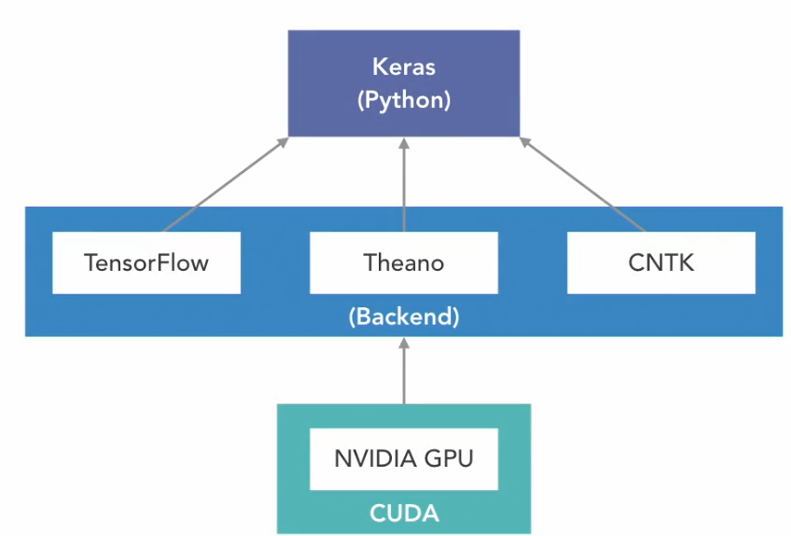

In [1]:
from PIL import Image
Image.open('Images/13-keras.png')

## Keras Components

### mobile.compile()

Before training a model, you need to configure the learning process, which is done via the compile method. 

It receives three arguments, 

(1) the optimizer, this is the algorithm that given a set of parameters returns one with a smaller loss function, 

(2) the loss, this is the objective function for measuring the accuracy of performance error of a neural network, and finally the 

(3) metrics, which is the list of metrics. For any classification problem, you will want to set this metrics to accuracy.

### Types of Optimizers

Here are some of the three common optimizers, 

- SGD, or __stochastic gradient descent__, this includes support for momentum, learning rate decay, and Nesterov momentum 


- __RMSprop__ is a good choice for recurrent neural networks


- __Adam__ is an algorithm for first-order gradient-based optimizations of stochastic objective functions. 

In our examples, we will use Adam as our optimizer of choice.

### Types of Loss

- __Mean_squared_error__ computes the element-wise square defense between the two tenses (regression)


- __Categorical_crossentropy__ computes the categorical crossentropy between predictions and targets, and this is often used when your target has multiple classes (multi-classification)


- __Binary_crossentropy__, we are computing the binary crossentropy between predictions and targets, and this is often used when your target has two classes (bi-classification)

-------------

## MNIST Keras Example

### Steps

1. Import packages
2. Load the data
3. Understanding the image data format
4. Preprocessing the image data
5. Build the model
6. Compile the model
7. Train the model
8. Plot the accuracy of the model
9. Plot the accuracy of the training and validation set
10. Accuracy of training and validation with loss
11. Evaluating the model

### Import Packages

In [2]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Load the Data

Load the data and check the shape so we know how to work with the data.

    X_train = 60k rows, 28x28 dimension 

    y_train = 60k; no shape

In [3]:
 (X_train, y_train), (X_test, y_test) = mnist.load_data() # shift tab tab to see data format; numpy array format

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Understanding the image data format

Use shape to see the dimension of the first element.

In [5]:
X_train[0].shape

(28, 28)

This is how the data looks below.

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

### Using plt.imshow() to show image

So the values in our first element will produce this picture below. We can use plt.imshow() to show the picture.

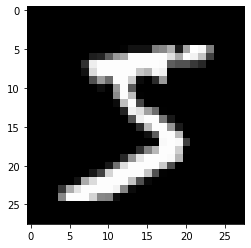

In [8]:
plt.imshow(X_train[0], cmap='gray')

### Preprocessing the image data

Make sure that our image data will be in the same width and height.

In [9]:
image_height, image_width = 28, 28

### Reshape the data

If we wanted to use this as our input to our neural network, we would need to reshape our image so that instead of it being a 28 by 28 image, we want to have a single line that is 784 across. 

This will reshape the data  that will give us one layer with 784 (28x28) neurons across.

In [10]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### Change data type to float32

Change the data type to float so we will not run into errors when we divide by 255 (which is the max number of our scale).

Before we scale it, we want to make sure its range is from 0 to 255 so we can type X_train[0].

In [11]:
print(X_train[0])

# Convert to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

### Rescale the data

We want to rescale our data from zero to one, as our original image is __gray scale__. So that means the value of the original pixels will be between zero and 255

The values will now be between 0 and 1.

In [12]:
# Scale the data (normalize)
X_train /= 255.0
X_test /= 255.0

# Check
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

### Reshaping pt2.

Remember the big picture is that for the training set, we have the images, so we've just converted, or reshaped our images to being of a single layer with 784 nodes. 

Now our output is going to be 10 different classes, so one for each digit. So let's see what the shape of our output is currently. So if I type the y_train.shape, I can see that my output is in fact a one dimensional array, and that's the case for my test data too. 

In [13]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [14]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Change our output data to 10 different bins (0-9)

In [15]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

# Check
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


See the change from (60000,) to (60000, 10)

### Build a model

In [16]:
# Instantiate sequential model
model = Sequential()

In [17]:
# Create input (first) fully connected layer so we have to include input_shape()
model.add(Dense(512, activation='relu', input_shape=(784,))) # 512 output nodes

# Add dense layer with a relu activation function
model.add(Dense(512, activation='relu')) # 512 output nodes

# Add a dense layer with a softmax activation function (used for classification)
model.add(Dense(10,activation='softmax')) # 10 output nodes - classification

Instructions for updating:
Colocations handled automatically by placer.


### Compile the model

In [18]:
# Compile the model using an adam optimizer
model.compile(optimizer='adam', # go-to optimizer
              loss='categorical_crossentropy', # crossentropy for multiple categories > 2; output = 10 bins/categories
              metrics=['accuracy']) # metric used

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### How are the parameters calculated?
784 pixels * 512 total nodes after termination + bias (total nodes in layer)

In [20]:
784*512+512

401920

512 pixels * 512 total nodes after termination + bias (total nodes in layer)

In [21]:
512*512+512

262656

512 pixels * 10 output nodes after termination + bias (total nodes in layer)

In [22]:
512*10+10

5130

### Train the model

In [23]:
# Fit the model with a validation dataset with 20 epochs
dense_model = model.fit(X_train,
                        y_train,
                        epochs=5,
                        validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.1813 - acc: 0.9447 - val_loss: 0.0923 - val_acc: 0.9706
Epoch 2/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0791 - acc: 0.9757 - val_loss: 0.0895 - val_acc: 0.9739
Epoch 3/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0546 - acc: 0.9827 - val_loss: 0.0756 - val_acc: 0.9776
Epoch 4/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0425 - acc: 0.9863 - val_loss: 0.0746 - val_acc: 0.9778
Epoch 5/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0352 - acc: 0.9892 - val_loss: 0.0947 - val_acc: 0.9756


### Evaluate and save

In [26]:
# Evaluate
error_rate = model.evaluate(X_test, # features
                            y_test) # expected output

# Save the model
model.save('dense_model.h5')

60000/60000 [==============================] - 1s 19us/step


### Plot the accuracy of the model

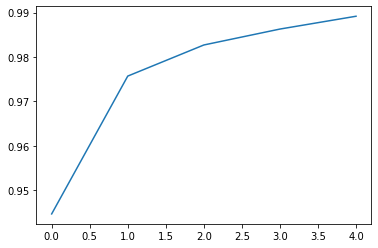

In [27]:
plt.plot(dense_model.history['acc'])

### Plot the accuracy of training and validation set

### Accuracy of training and validation with loss

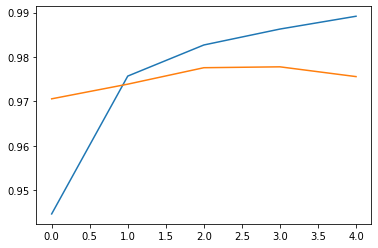

In [28]:
# Training accuracy (blue)
plt.plot(dense_model.history['acc'])

# Validation accuracy (orange)
plt.plot(dense_model.history['val_acc'])

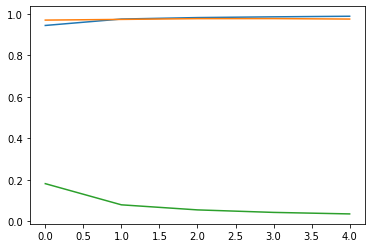

In [29]:
plt.plot(dense_model.history['acc'])
plt.plot(dense_model.history['val_acc'])

# Add loss (green)
plt.plot(dense_model.history['loss'])

### Evaluating the model

In [30]:
# Evaluate the model with test data
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 19us/step


In [31]:
score

[0.09471807340958913, 0.9756]